In [407]:
#!/usr/bin/env python3
import csv
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import os.path
from matplotlib import rcParams
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Meiryo"]

out_dir = "out/"
os.makedirs(out_dir, exist_ok=True)

# import csv files
import_files = ['./import/0000.csv',]

#プロットピッチと時間軸名を入力
plt_pitch = 60
dictionary = {3600:"1hour",1800:"30min",60:"1min",1:"1sec"}

plt_name = dictionary[plt_pitch]

In [408]:
col_name = range(1,11,1)
df0 = pd.read_csv(import_files[0], names = col_name, encoding="shift-jis", delimiter=",", dtype="object")

In [409]:
df_data = df0.loc[df0[1] == 'データ数']
print("Data number = ",df_data.iloc[0,2])

header_num = int(df0.iloc[0,2])
print("Header number =",header_num)
_df0 = df0[header_num:]

Data number =  83036
Header number = 48


In [410]:
#前3列削除
_df0 = _df0.drop([1,2,3], axis=1)

In [411]:
#NaN削除
_df0 = _df0.dropna(how='all', axis=1)
_df0 = _df0.dropna(how='any')

#BURNOUT削除
for i in range(4,7):
    _df0 = _df0[_df0[i]!="BURNOUT"]

_df0 = _df0[1:].astype(float)

In [412]:
#100℃以上の列削除
for i in range(4,7):
    _df0 = _df0[_df0[i]<=100]
_df0

,4,5,6,7,8,9,10
297,-4.7,-0.6,68.2,20.0,21.3,8.106,8.110
298,-4.9,-0.7,-0.5,20.0,21.3,8.106,8.110
299,-5.1,-0.9,-0.6,20.0,21.3,8.106,8.110
300,-5.3,-1.0,-0.6,20.0,21.3,8.106,8.110
301,-5.5,-1.1,-0.7,20.0,21.3,8.106,8.110
...,...,...,...,...,...,...,...
81770,28.1,58.4,60.1,-19.7,55.9,8.106,8.106
81771,28.2,58.3,60.1,-19.7,55.8,8.106,8.106
81772,28.3,58.3,60.1,-19.6,55.8,8.106,8.106
81773,28.3,58.4,60.1,-19.5,55.8,8.106,8.106


In [413]:
row, col = _df0.shape
print('row =',row,'colum =',col)

#真空度変換かつ200Pa以上の列削除
for j in range(5,7):
    for i in range(0,row):
        _df0.iloc[i,j] = 10**(_df0.iloc[i,j] - 3)

for i in range(9,11):
    _df0 = _df0[_df0[i]<=200]
_df0

row = 81478 colum = 7


,4,5,6,7,8,9,10
1546,-15.8,-10.1,-10.4,-35.6,23.5,199.986187,138.675583
1547,-15.8,-10.1,-10.5,-35.6,23.5,199.986187,138.675583
1548,-15.8,-10.1,-10.5,-35.6,23.5,199.986187,138.675583
1549,-15.8,-10.1,-10.5,-35.6,23.5,199.986187,137.720947
1550,-15.8,-10.1,-10.5,-35.6,23.5,199.986187,137.720947
...,...,...,...,...,...,...,...
81647,24.0,57.0,57.4,-36.4,57.0,73.113908,62.086903
81648,24.0,57.0,57.4,-36.4,56.9,73.113908,62.086903
81649,24.0,57.0,57.4,-36.4,56.9,73.113908,62.086903
81650,24.0,57.0,57.4,-36.4,56.9,73.113908,62.086903


C:\Users\0296\AppData\Local\Temp\ipykernel_1752\2423349040.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


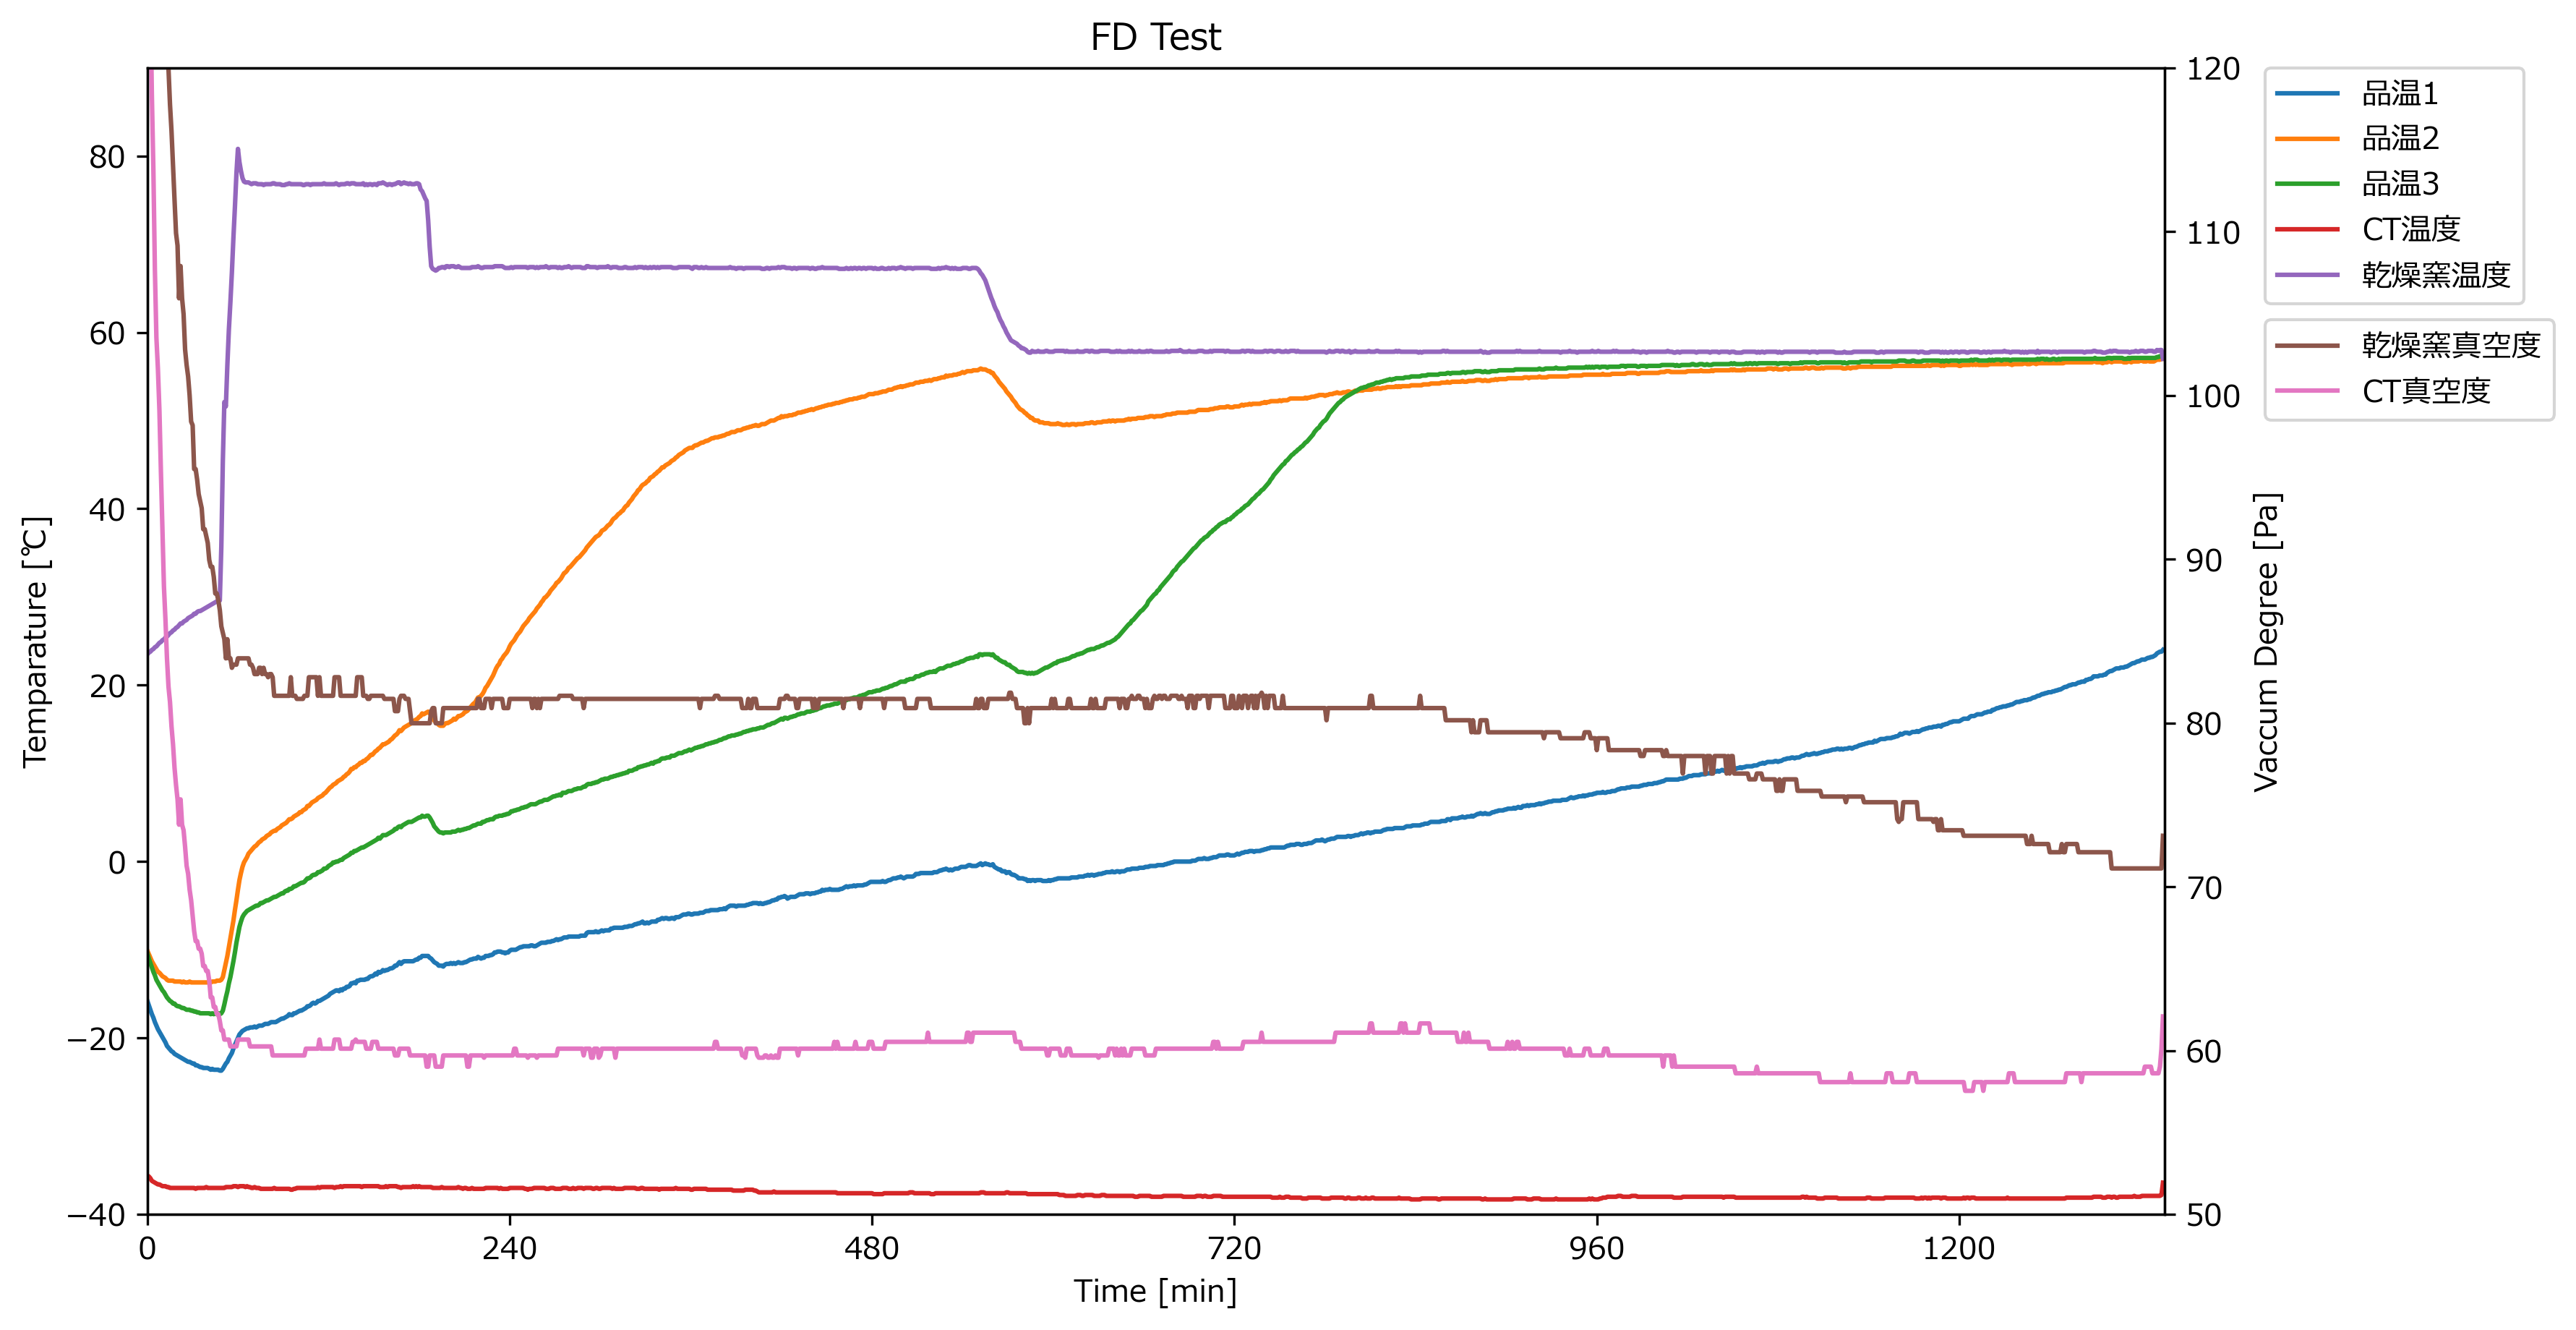

In [414]:
# for test
ch1 = []
ch2 = []
ch3 = []
ch4 = []
ch5 = []
ch6 = []
ch7 = []

row, col = _df0.shape
ch_temp = [ch1, ch2, ch3, ch4, ch5]
ch_names_temp = ["品温1","品温2","品温3","CT温度","乾燥窯温度"]
col_temp = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
ch_vd = [ch6, ch7]
ch_names_vd = ["乾燥窯真空度","CT真空度"]
col_vd = ['#8c564b', '#e377c2']

#温度(ch1～5)プロット
for ch, j in zip(ch_temp, range(5)):
    for i in range(0, row, plt_pitch):
        a = _df0.iloc[i,j]
        ch.append(a)

# 真空度(ch6～7)プロット
for ch, j in zip(ch_vd, range(5,7)):
    for i in range(0, row, plt_pitch):
        a = _df0.iloc[i,j]
        ch.append(a)

fig = plt.figure(figsize=(12, 7), dpi=300)
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.set_title('FD Test')
ax1.set_xlabel('Time [min]')
ax1.set_ylabel('Temparature [℃]')
ax2.set_ylabel('Vaccum Degree [Pa]')
ax1.set_xlim([0,len(ch1)])
ax1.set_xticks(np.arange(0,len(ch1),step=240))
ax1.set_ylim([-40, 90])
ax2.set_ylim([50, 120])


for ch, names, col in zip(ch_temp, ch_names_temp, col_temp):
    ax1.plot(ch, label = names, color = col)
    
for ch, names, col in zip(ch_vd, ch_names_vd, col_vd):
    ax2.plot(ch, label = names, color = col)

ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
ax2.legend(bbox_to_anchor=(1.05, 0.78), loc='upper left', borderaxespad=0, fontsize=10)
fig.show()
# fig.savefig(out_dir + "{}.jpg".format(time))